In [ ]:
"Documents/D&D/Codes/merged_card_data.json"

In [ ]:
a = None
while a:
    print("test")
print("done")

In [12]:

import random
import json
import numpy as np
#import pygame
import os
import time
from scipy.stats import hypergeom, tstd
import itertools
import torch.nn.init as init
from torch import nn, optim
import torch
import math

In [2]:
from maputil import generate_minimap, Minimap #Function that generates three lists: nodes (descriptions of events at each location), map (similar to nodes, with a 1 if a node is present and 0 if absent), and connections (a list of arrays describing a sufficient and non-intersecting set of connections from each layer to the next)

pygame 2.3.0 (SDL 2.24.2, Python 3.10.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


SyntaxError: invalid syntax. Perhaps you forgot a comma? (gamedata.py, line 283)

In [7]:
from aiutil import land_policy_net, deck_costs
from cardutil import select_cards, shortened_card_data, sample_deck #Select cards picks a selection of n random cards from the array shortened_card_data, based on dictionaries of positive and negative parameters

In [21]:
color_combinations = [[], ['W'], ['U'], ['B'], ['R'], ['G'], ['W', 'U'], ['W', 'B'], ['W', 'R'], ['W', 'G'], ['U', 'B'], ['U', 'R'], ['U', 'G'], ['B', 'R'], ['B', 'G'], ['R', 'G'], ['W', 'U', 'B'], ['W', 'U', 'R'], ['W', 'U', 'G'], ['W', 'B', 'R'], ['W', 'B', 'G'], ['W', 'R', 'G'], ['U', 'B', 'R'], ['U', 'B', 'G'], ['U', 'R', 'G'], ['B', 'R', 'G'], ['W', 'U', 'B', 'R'], ['W', 'U', 'B', 'G'], ['W', 'U', 'R', 'G'], ['W', 'B', 'R', 'G'], ['U', 'B', 'R', 'G'], ['W', 'U', 'B', 'R', 'G'], ['U', 'B', ''], ['G', 'W', 'R'], ['G', 'R', ''], ['G', 'W', ''], ['U', 'W', 'G'], ['B', 'G', 'R'], ['W', 'R', ''], ['R', 'U', ''], ['U', 'W', ''], ['', 'B', 'G'], ['B', 'W', 'U'], ['G', 'B', 'U'], ['W', '', 'R'], ['R', 'B', ''], ['', 'R', 'B'], ['R', 'B', 'W'], ['B', '', 'G'], ['G', 'R', 'W'], ['G', 'R', 'B'], ['', 'W', 'B'], ['G', 'U', 'W'], ['W', '', 'G'], ['U', 'W', 'B'], ['G', '', 'B'], ['G', 'U', 'W'], ['R', 'U', 'W'], ['G', 'W', ''], ['U', 'R', 'G'], ['G', 'B', 'W'], ['B', '', 'U'], ['W', 'U', ''], ['B', 'G', '']]

decks = [select_cards(shortened_card_data, 20, {'color': c},
                      exclusive = {'color': True}, blankparams = False,  
                      negparams = {"card_type":["Land", "Token", "Emblem"]}) for c in color_combinations]

decks[5]

[{'set': ['bfz'],
  'rarity': ['rare'],
  'color': [],
  'mana_cost': ['6'],
  'mana_symbols': [],
  'name': ['Conduit of Ruin'],
  'cmc': [6.0],
  'card_type': ['Creature'],
  'subtypes': ['Eldrazi'],
  'keywords': [],
  'watermark': [],
  'oracle_text': ['When you cast this spell, you may search your library for a colorless creature card with mana value 7 or greater, reveal it, then shuffle and put that card on top.\nThe first creature spell you cast each turn costs {2} less to cast.'],
  'legend': [False]},
 {'set': ['shm'],
  'rarity': ['common'],
  'color': [],
  'mana_cost': ['2'],
  'mana_symbols': [],
  'name': ['Pili-Pala'],
  'cmc': [2.0],
  'card_type': ['Artifact', 'Creature'],
  'subtypes': ['Scarecrow'],
  'keywords': ['Flying'],
  'watermark': [],
  'oracle_text': ['Flying\n{2}, {Q}: Add one mana of any color. ({Q} is the untap symbol.)'],
  'legend': [False]},
 {'set': ['m11'],
  'rarity': ['uncommon'],
  'color': [],
  'mana_cost': ['1'],
  'mana_symbols': [],
  'name'

In [20]:
decklist = decks[5]
total_lands = 20
cost_ratios, minimums = deck_costs(decklist) #One normalised 1*23 array, and the minimums
state = torch.tensor(np.concatenate((cost_ratios, np.asarray([total_lands*0.05]))), dtype=torch.float32).unsqueeze(0)
# Sample action (land_ratios) from the policy
# Convert probabilities to land_ratios
land_ratios = land_policy_net(state).squeeze(0)
land_ratios = torch.abs(land_ratios)

# Perform any necessary normalization or conversion to integers, etc. here
# Example: Normalize the values to sum to a specific total number of lands
land_ratios = torch.mul(land_ratios, total_lands*0.2).requires_grad_()
land_ratios = land_ratios.detach().numpy().astype(int)
land_ratios

array([ 0,  1,  0,  0, 20,  0])

In [ ]:
def select_lands(decklist, model = land_policy_net):
    cost_ratios, minimums = deck_costs(decklist) #One normalised 1*23 array, and the minimums
    #total_lands = sum(minimums)
    state = torch.tensor(np.concatenate((cost_ratios, np.asarray([total_lands*0.05]))), dtype=torch.float32).unsqueeze(0)
    # Sample action (land_ratios) from the policy
    # Convert probabilities to land_ratios
    land_ratios = policy_net(state).squeeze(0)
    land_ratios = torch.abs(land_ratios)

    # Perform any necessary normalization or conversion to integers, etc. here
    # Example: Normalize the values to sum to a specific total number of lands
    land_ratios = torch.mul(land_ratios, total_lands*0.2).requires_grad_()
    land_ratios = soft_integer_round(land_ratios)
    land_list = []
    for c, v in ratios.items():
        parameters = {"set": [], 'card_type': ['Basic'],'color': [c]}
        exclusive={"set": False, 'card_type': False,'color': True}
        blankparams={"set": True, 'card_type': True,'color': True}
        if c == "N":
            parameters["color"] = []
            blankparams["color"] = False
        if sets is not None:
            parameters["set"] = sets
            exclusive["set"] = True
        land_list.append(i for i in select_cards(shortened_card_data, v, params = parameters, exclusive=exclusive, negparams=None, blankparams=blankparams))
    return(land_list)

In [4]:
def land_list_to_ratios(lands):#Turn a list of lands into a dict of color coverage
    land_ratio = {"W":0, "U":0, "B":0,"R":0,"G":0,"C":0}
    for land in lands:
        for c in land["color"]:
            land_ratio[c] += 1
        if len(land["color"]) == 0:
            land_ratio["C"] += 1
    return(land_ratio)

def eval_card(card, land_ratio, total_l = None):#Determine the chance that a card can be played "on curve" using the given lands. Should be 100% for a mono coloured deck, less for rare colors
    if type(land_ratio) == list:
        land_ratio = land_list_to_ratios(land_ratio)
    if total_l == None: #Doesn't have to be passed in, but it's quicker in case this is used many times at once
        total_l = sum(v for v in land_ratio.values())
    probability = 1
    cmc = int(card["cmc"][0])
    if cmc > total_l:
        probability = 0
    else:
        for color in ["W", "U", "B","R","G","C"]:
            num = card["mana_cost"].count(color)
            if num > 0:
                if num > land_ratio[color]:
                    probability = 0
                else:
                    hg = hypergeom.sf(num-1,total_l,land_ratio[color],cmc) #Chance you haven't gotten less than the required number of successes (ie lands of the right type). This can potentially be made more efficient if needed, but selecting different things to check in different cases, but this is probably fine in most cases
                    probability *= hg
    return(probability)

def eval_deck(deck, land_ratio):#Iterate over all cards, written separately to clean up some other steps
    if type(land_ratio) == list:
        land_ratio = land_list_to_ratios(land_ratio)
    total_l = sum(v for v in land_ratio.values())
    probs = []
    for card in deck:
        probs.append(eval_card(card, land_ratio, total_l))
    return(probs)
def deck_costs(deck):
    symbols = ["W", "U", "B","R","G","C"]
    ratios = np.zeros(len(symbols))
    minimums = np.zeros(len(symbols))
    fractions = np.zeros(len(symbols))
    for i in range(len(symbols)):
        c = symbols[i]
        costs = [card["mana_cost"].count(c) for card in deck]
        devotions = [card["mana_cost"].count(c)/max(card["cmc"][0], 1) for card in deck]
        ratios[i] = sum(costs)/len(deck)
        fractions[i] = sum(devotions)/len(deck)
        minimums[i] = max(costs)
    #ratios = ratios/(max(np.sum(ratios),1))
    costs = np.asarray([card["cmc"][0] for card in deck])
    colorscount = np.asarray([sum([min(card["mana_cost"].count(c),0.2) for c in symbols]) for card in deck])
    return(np.concatenate((ratios, minimums*0.2, fractions*2, [np.min(costs)*0.05], [np.max(costs)*0.05], [np.mean(costs)*0.05], [np.mean(colorscount)],[np.max(colorscount)])), minimums)#1*23 array of normalised values, and a separate mins array
def refine_deck(deck, land_ratio, minimums={"W": 0, "U": 0, "B": 0, "R": 0, "G": 0, "C": 0}, target=20):
    if type(land_ratio) == list:
        land_ratio = land_list_to_ratios(land_ratio)
    total_l = sum(v for v in land_ratio.values())
    
    # Find the worst-performing card
    worst_card = None
    worst_prob = 1.0
    for card in deck:
        prob = eval_card(card, land_ratio, total_l)
        if prob < worst_prob:
            worst_prob = prob
            worst_card = card

    if worst_card is None:
        return land_ratio

    # Calculate potential improvements
    max_improvement = 0.0
    best_change = None
    for color in land_ratio.keys():
        
        # Adding a land of the required color
        for delta in range(-2,2):
            if abs(total_l+delta-target) <= 1 and land_ratio[color]+delta >= minimums[color]:#Try adjusting if it doesn't stray too far from the target or break the minimums
                new_land_ratio = land_ratio.copy()
                new_land_ratio[color] += 1
                new_prob = eval_card(worst_card, new_land_ratio, total_l + delta)
                improvement = new_prob - worst_prob
                if improvement > max_improvement:
                    max_improvement = improvement
                    best_change = (color, delta)
    # Apply the best change
    if best_change is not None:
        land_ratio[best_change[0]] += best_change[1]

    return land_ratio

def refine_deck_a(deck, land_ratio, minimums = {"W":0, "U":0, "B":0,"R":0,"G":0,"C":0}, target = 20):#Newest method of refining a deck's land list
    if type(land_ratio) == list:
        land_ratio = land_list_to_ratios(land_ratio)
    total_l = sum(v for v in land_ratio.values())
    oldeval = min(eval_deck(deck, land_ratio))
    oldland = land_ratio
    for color in minimums.keys():#Propose and evaluate a change per colour
        if total_l <= target+1:
            land_ratio[color] += 1
            total_l += 1
        elif land_ratio[color] > minimums[color] and total_l >= target-1:
            land_ratio[color] -= 1
            total_l -= 1
        neweval = min(eval_deck(deck, land_ratio))#Reevaluate proposed change, note that this is time consuming
        if neweval < oldeval: #Only accept changes that improve or don't change worst case performance of a deck
            land_ratio[color] = oldland[color] 
    return(land_ratio)
def refine_deck_old(deck, land_ratio, minimums = {"W":0, "U":0, "B":0,"R":0,"G":0,"C":0}, target = 20):#Previous refinement method, also didn't work well but was faster
    if type(land_ratio) == list:
        land_ratio = land_list_to_ratios(land_ratio)
    total_l = sum(v for v in land_ratio.values())
    for card in deck:
        if random.random() < eval_card(card, land_ratio): #Make changes based on poorly performing cards only
            cmc = int(card["cmc"][0])
            for color in minimums.keys():
                num = card["mana_cost"].count(color)
                if num:
                    if total_l <= target and random.random() > hypergeom.sf(num-1,total_l,land_ratio[color],cmc):
                        land_ratio[color] += 1
                        total_l += 1
                elif land_ratio[color] > minimums[color] and total_l >= target:
                    land_ratio[color] -= 1
                    total_l -= 1
    return(land_ratio)

In [5]:


print(land_ratio_dict)
print(filtered_land_ratio_dict)
print(old_minimums)
print(eval_deck(old_deck, land_ratio_dict))
print()
print(eval_deck(old_deck, filtered_land_ratio_dict))
deck_costs(old_deck)
old_deck[-3]

NameError: name 'land_ratio_dict' is not defined

In [58]:
print(land_list_to_ratios(landeck))
land_ratio = refine_deck(newdeck, landeck)
for _ in range(5):
    land_ratio = refine_deck(newdeck, land_ratio)
    total_l = sum(v for v in land_ratio.values())
    print(total_l)
    print(land_ratio)

{'W': 3, 'U': 3, 'B': 3, 'R': 3, 'G': 0, 'C': 3}
19
{'W': 4, 'U': 7, 'B': 2, 'R': 3, 'G': 0, 'C': 3}
19
{'W': 4, 'U': 7, 'B': 2, 'R': 3, 'G': 0, 'C': 3}
19
{'W': 5, 'U': 9, 'B': 0, 'R': 2, 'G': 0, 'C': 3}
19
{'W': 6, 'U': 10, 'B': 0, 'R': 1, 'G': 0, 'C': 2}
19
{'W': 6, 'U': 10, 'B': 0, 'R': 2, 'G': 0, 'C': 1}


In [6]:
def select_lands(n = 20, card_list = [], sets = None, offset = 0.4, test = False, iterations = 0):
    #from cardutil import select_cards
    ratios =  = {'W': 0, 'U': 0, 'B': 0, 'R': 0, 'G': 0, 'C': 0}
    minimums = {'W': 0, 'U': 0, 'B': 0, 'R': 0, 'G': 0, 'C': 0}
    total_c = 0
    for c, v in ratios.items():
        total_c += v #calculate inital total of colours
    if test: #Optional rebalancing method
        for c, v in ratios.items(): #reweight so that there's a more even spread of lands
            if v > 0:
                if v > total_c*0.9:
                    ratios[c] = 3
                elif v > total_c*0.5:
                    ratios[c] = 2
                else:
                    ratios[c] = 1
        total_c = 0
        for c, v in ratios.items():
            total_c += v #recalculate totals in weighted lists
    if total_c == 0:
        ratios = {"W":1, "U":3, "B":1,"R":0,"G":0,"C":0} #Default arrangement for colorless decks
        total_c = 5
    for c, v in ratios.items():
        newval = max(v * n/total_c + offset,0)
        newval = max(int(newval), minimums[c])
        ratios[c] = newval#Currently just one step, weighted ratio will be used unless it's less than the minimum amount needed
    
    for _ in range(iterations): #Alternative fixing methods
        ratios = refine_deck(card_list, ratios, minimums, target = n)
    total_c = 0
    for c, v in ratios.items():
        total_c += v #recalculate totals in weighted lists
        land_list = []
    for c, v in ratios.items():
        parameters = {"set": [], 'card_type': ['Basic'],'color': [c]}
        exclusive={"set": False, 'card_type': False,'color': True}
        blankparams={"set": True, 'card_type': True,'color': True}
        if c == "C":
            parameters["color"] = []
            blankparams["color"] = False
        if sets is not None:
            parameters["set"] = sets
            exclusive["set"] = True
        sublist = select_cards(shortened_card_data, v, params = parameters, exclusive=exclusive, negparams=None, blankparams=blankparams)
        for i in sublist:
            land_list.append( i )
    return(land_list)

SyntaxError: invalid syntax (1263938695.py, line 3)

In [123]:
a = [3,6,8,1,1,2,0]
print(sum(a))

21


In [7]:
newdeck = select_cards(shortened_card_data, 20, {'color': ["U"]},exclusive = False, blankparams = False, negparams = {"color":["G"],"card_type":["Basic", "Token", "Emblem"]})
landeck = select_lands(15, newdeck, offset = 0)
print(len(newdeck))
print(len(landeck))
print(land_list_to_ratios(landeck))
carda = newdeck[1]
print(carda["mana_cost"])
print(deck_costs(newdeck))

NameError: name 'select_lands' is not defined

In [ ]:
print(land_list_to_ratios(landeck))

print(eval_card(carda,landeck))

In [ ]:
time.time()

In [ ]:
n = 1
numlands = 20
samples = 100
maxiters = 7
bestcase = 0
bestcase_terms = []
for offset in range (n):
    for iters in range(maxiters+1):
        for testcase in [True]:
            start = time.time()
            offs = offset/n
            errors = 0
            mins=[]
            means = []
            for _ in range(samples):
                newdeck = select_cards(shortened_card_data, 20, {'color': random.sample(["W", "U","B", "R","G"],2)},exclusive = False, blankparams = False,  negparams = {"card_type":["Basic", "Token", "Emblem"]})
                landeck = select_lands(numlands, newdeck, offset = offs, iterations = iters, test = testcase)
                errors += abs((len(landeck)-numlands)/samples)
                probs = eval_deck(newdeck, landeck)
                mins.append(min(probs)) 
                means.append(sum(probs)/len(probs))
            pace = samples/(time.time() - start)
            minprob = sum(mins)/samples
            stdevmin = tstd(mins)
            mean = sum(means)/samples
            stdev = tstd(means)
            print(f"offset: {offs}, iters: {iters}")
            print(f"avg card error: {errors}" )
            print(f"min prob: {round(minprob,3)} +- {round(stdevmin,3)}")
            print(f"mean prob:{round(mean,3)} +- {round(stdev,3)}")
            print(f"pace: {pace}")
            print()
            if minprob > bestcase:
                bestcase = minprob
                bestcase_terms = [f"offset: {offs}, iters: {iters}",f"avg card error: {errors}",f"pace: {pace}", stdev]
print(bestcase_terms)
print(bestcase)

In [8]:
import torch


def eval_deck_tensor(deck, land_ratio_dict_tensor, filtered_land_ratio_dict_tensor=None):
    min_probs = []
    card_probs = []
    total_l = torch.sum(land_ratio_dict_tensor).clone().detach().requires_grad_(True)
    for card in deck:
        prob = eval_card_tensor(card, land_ratio_dict_tensor, total_l)
        card_probs.append(prob)
    min_probs.append(torch.min(torch.stack(card_probs)))
    min_probs.append(torch.mean(torch.stack(card_probs)))
    if filtered_land_ratio_dict_tensor is not None:
        for land_ratio_dict_tensor in [filtered_land_ratio_dict_tensor]:
            card_probs = []
            total_l = torch.sum(land_ratio_dict_tensor).clone().detach().requires_grad_(True)
            for card in deck:
                prob = eval_card_tensor(card, land_ratio_dict_tensor, total_l)
                card_probs.append(prob)
            min_probs.append(torch.min(torch.stack(card_probs))*0.01)
    loss = torch.sum(torch.stack(min_probs))
    loss = torch.div(1,torch.add(loss,0.1))#loss = torch.pow(loss,4) #Steeper gradient around probability of 0
    if filtered_land_ratio_dict_tensor is not None:
        loss += torch.sum(torch.abs(torch.sub(land_ratio_dict_tensor,filtered_land_ratio_dict_tensor))*0.05)
    return loss.requires_grad_(True), min_probs


def combo (n, k):#Number of possible combinations, adjusted to allow continuous variables and to work with tensors
    return ((n + 1).lgamma() - (k + 1).lgamma() - ((n - k) + 1).lgamma()).exp()
def hypergeom_cdf(k, N, K, n):#Cumulative distribution function for draw likelihoods (likelihood of up to a certain value)
    i = torch.arange(0, int(k + 1)).float()
    num_comb = combo(K, i) * combo(N - K, n - i)
    total = num_comb.sum()
    return total / combo(N, n)

def hypergeom_sf(k, N, K, n):#Survival function: odds of not getting k or fewer hits on n draws without replacement, given K targets in a pool of N
    return 1 - hypergeom_cdf(k, N, K, n).requires_grad_(True)


def eval_card_tensor(card, land_ratio_dict_tensor, total_l):
    cmc = torch.tensor(float(card["cmc"][0]), dtype=torch.float32)
    probability = torch.tensor(1.0, dtype=torch.float32)

    if cmc > total_l:
        return torch.tensor(0.0, dtype=torch.float32)

    for idx, color in enumerate(["W", "U", "B", "R", "G", "C"]):
        num = torch.tensor(float(card["mana_cost"].count(color)), dtype=torch.float32)
        if num > 0: #If a card requires a certain type of mana
            if num > land_ratio_dict_tensor[idx]:
                return torch.tensor(0.0, dtype=torch.float32) #If there isn't enough of that type
            else:
                hg = hypergeom_sf(num - 1, total_l, land_ratio_dict_tensor[idx], cmc)#Probablity of getting enough of that type
                probability *= hg#adjust overall probability

    return probability



In [80]:
from scipy.special import betainc as betainc_scipy

def hypergeom_sf_scipy(k, N, K, n):
    return hypergeom.sf(k, N, K, n)
test_cases = [
    (1, 10, 4, 3),
    (2, 20, 8, 6),
    (3, 30, 10, 10),
    (4, 40, 15, 12),
    (5, 50, 20, 15),
    (5, 50, 20, 15.1),
    (5, 50, 20, 16),
]
print("Scipy Implementation\t\tPyTorch Implementation")
print("----------------------------------------------------------------------")
for k, N, K, n in test_cases:
    scipy_result = hypergeom_sf_scipy(k, N, K, n)
    pytorch_result = hypergeom_sf(torch.tensor(k), torch.tensor(N), torch.tensor(K), torch.tensor(n)).item()
    print(f"{scipy_result:.6f}\t\t\t{pytorch_result:.6f}")

Scipy Implementation		PyTorch Implementation
----------------------------------------------------------------------
0.333333			0.333334
0.455108			0.455110
0.439661			0.439662
0.495032			0.495031
0.620181			0.620177
nan			0.629552
0.708876			0.708875
tensor(5)


In [9]:


# Define a function to get all color combinations


In [15]:

def get_color_combinations(colors):
    color_combinations = []
    for length in range(len(colors) + 1):
        for subset in itertools.combinations(colors, length):
            color_combinations.append(list(subset))
    return color_combinations


# Get all color combinations, including the colorless deck
colors = ["W", "U", "B", "R", "G"]
color_combinations = get_color_combinations(colors)
color_combinations+= [random.sample(["W", "U","B", "R","G", ""],3) for _ in range(32)]
print(color_combinations)

# Define the neural network architecture
class ContinuousPolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ContinuousPolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.fc2 = nn.Linear(hidden_size*2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        # Initialize weights
        init.normal_(self.fc1.weight, mean=0, std=0.25)
        init.normal_(self.fc2.weight, mean=0, std=0.25)
        init.normal_(self.fc3.weight, mean=0, std=0.25)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        #x = torch.mul(x,x1[0,0:6])
        return x
    
    def print_weights(self):
        print("fc1.weight", torch.sum(self.fc1.weight).item())
        print("fc1.bias", torch.sum(self.fc1.bias).item())
        print("fc2.weight", torch.sum(self.fc2.weight).item())
        print("fc2.bias", torch.sum(self.fc2.bias).item())
        print("fc3.weight", torch.sum(self.fc3.weight).item())
        print("fc3.bias", torch.sum(self.fc3.bias).item())
class ContinuousPolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, hidden_layers=1):
        super(ContinuousPolicyNetwork, self).__init__()
        self.output_size = output_size
        self.input_size = input_size
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
        self.layers.append(nn.Linear(hidden_size, output_size))

        # Initialize weights
        for layer in self.layers:
            init.normal_(layer.weight, mean=0, std=0.25)

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
        x = self.layers[-1](x)  # Remove activation function from the last layer
        return x
    
    def print_weights(self):
        for layer in self.layers:
            print("weight", torch.sum(layer.weight).item())
            print("bias", torch.sum(layer.bias).item())
    
    def add_preprocess(self):
        new_layer = nn.Linear(self.input_size, self.input_size)
        init.normal_(new_layer.weight, mean=0, std=0.1)
        self.layers.insert(0, new_layer)
    
    def add_postprocess(self):
        new_layer = nn.Linear(self.output_size, self.output_size)
        init.normal_(new_layer.weight, mean=-0.2, std=0.1)
        self.layers.append(new_layer)


# Define hyperparameters
input_size = 24  # cost_ratios and minimums concatenated
hidden_size = 48
output_size = 6  # number of possible actions (land_ratios)
learning_rate = 1e-2
num_episodes = 500
deck_refresh = 1
def soft_integer_round(x, factor=0.8):
    return torch.add(x , (torch.sin((0.5+x) * 2 * math.pi) / (2 * math.pi)),alpha=factor)

# Create the policy network
policy_net = ContinuousPolicyNetwork(input_size, hidden_size, output_size, 2)
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)

prelearning = 1000
batch_size = 32
episode = 0
for episode in range(prelearning):#while prelearning and episode < num_episodes*batch_size:
    if episode % deck_refresh == 0: #Keep decks for a short length of time, so that training can go towards something consistent for a while
        total_lands = int(random.random()*20)+10 #Currently randomised, should this be fed into the model?
        # Generate a random cost_ratio and minimums
        newdeck = select_cards(shortened_card_data, total_lands, 
                     {'color': random.sample(["W", "U","B", "R","G", ""],3)},
                     exclusive = False, blankparams = False,  negparams = {"card_type":["Land", "Token", "Emblem"]})
        cost_ratios, minimums = deck_costs(newdeck) #One normalised 1*23 array, and the minimums
        #total_lands = sum(minimums)
        state = torch.tensor(np.concatenate((cost_ratios, np.asarray([total_lands*0.05]))), dtype=torch.float32).unsqueeze(0)
        
    
    # Sample action (land_ratios) from the policy
    
    # Convert probabilities to land_ratios
    land_ratios = policy_net(state).requires_grad_().squeeze(0)
    land_ratios = torch.abs(land_ratios).requires_grad_()
    
    # Perform any necessary normalization or conversion to integers, etc. here
    # Example: Normalize the values to sum to a specific total number of lands
    land_ratios = torch.mul(land_ratios, total_lands*0.2).requires_grad_()
    land_ratios = soft_integer_round(land_ratios)
    loss = torch.nn.functional.cross_entropy(land_ratios, torch.tensor(minimums, dtype=torch.float32))
    loss = torch.add(loss, torch.pow(torch.sub(torch.div(torch.sum(land_ratios),total_lands),1),2), alpha=0.1)
    #loss = torch.add(torch.nn.functional.cross_entropy(land_ratios, torch.tensor(cost_ratios[0:6], dtype=torch.float32)), loss) #Aim for something between the two
    # Update the model's parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if episode % (deck_refresh*10) ==0 :
        filtered_land_ratios = torch.max(land_ratios, torch.tensor(minimums).requires_grad_())
        _, minprob = eval_deck_tensor(newdeck, land_ratios, filtered_land_ratios)
        print(f"Episode {episode}, Loss: {loss.item()}, minprob: {minprob[0]}")
losses = []
#policy_net.add_postprocess()
learning_rate = 1e-3
weight_decay = 1e-5  # You can adjust this value as needed
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate, weight_decay=weight_decay)

for episode in range(num_episodes):
    if episode % deck_refresh == 0: #Keep decks for a short length of time, so that training can go towards something consistent for a while
        total_lands = int(random.random()*10)+15 #Currently randomised, should this be fed into the model?
        # Generate random cost_ratios
        color_combinations = get_color_combinations(colors)
        color_combinations+= [random.choices(["W", "U","B", "R","G"],k=2) for _ in range(32)]
        decks = [
            select_cards(shortened_card_data, total_lands, 
                         {'color': c},
                         exclusive = {'color': True}, blankparams = False,  negparams = {"card_type":["Land", "Token", "Emblem"]}
                        ) for c in color_combinations]
        states = [# Sample state (land_ratios) from the policy
            torch.tensor(np.concatenate((deck_costs(deck)[0], np.asarray([total_lands*0.05]))), dtype=torch.float32).unsqueeze(
                0)
            for deck in decks
        ]
        
    
    
    batch_losses = []
    batch_minprob = []
    for state, deck in zip(states, decks):
        # Sample action (land_ratios) from the policy
        land_ratios = policy_net(state).requires_grad_().squeeze(0)
        land_ratios = torch.abs(land_ratios)#.requires_grad_()

        # Perform any necessary normalization or conversion to integers, etc. here
        land_ratios = torch.mul(land_ratios, total_lands*0.2).requires_grad_()
        land_ratios = soft_integer_round(land_ratios)
        loss, minprob = eval_deck_tensor(deck, land_ratios)
        loss = torch.add(loss, torch.pow(torch.sub(torch.div(torch.sum(land_ratios),total_lands),1),2), alpha=2)
        batch_losses.append(loss)
        batch_minprob.append(minprob[0])
    
    
    # Update the model's parameters
    avg_loss = torch.stack(batch_losses).mean()
    optimizer.zero_grad()
    avg_loss.backward()
    optimizer.step()
    losses.append(avg_loss.item())#.detach().numpy()[0])
    if False and (episode+1) %100 == 0: #Readjust model periodically
        policy_net.add_postprocess()
        optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
    if 0 ==episode % (deck_refresh*100):#in ((episode+1) % (deck_refresh),episode % (deck_refresh)) :
        print(f"Episode {episode}, Loss: {avg_loss.item()}, minprob: {torch.stack(batch_minprob).mean()}")
        #policy_net.print_weights()
        #print(land_ratios[0:-1])
        #print(torch.tensor(minimums, dtype=torch.float32)[0:-1])
        if 0 == episode % (deck_refresh) :
            print(states[-1][0][0:6])
            print(states[-1][0][6:12])
            print(states[-1][0][12:18])
            print(states[-1][0][18:24])
            print(land_ratios)
            print(loss)
            for name, param in policy_net.named_parameters():
                if False and param.grad is not None:
                    print(name, param.grad.norm())


[[], ['W'], ['U'], ['B'], ['R'], ['G'], ['W', 'U'], ['W', 'B'], ['W', 'R'], ['W', 'G'], ['U', 'B'], ['U', 'R'], ['U', 'G'], ['B', 'R'], ['B', 'G'], ['R', 'G'], ['W', 'U', 'B'], ['W', 'U', 'R'], ['W', 'U', 'G'], ['W', 'B', 'R'], ['W', 'B', 'G'], ['W', 'R', 'G'], ['U', 'B', 'R'], ['U', 'B', 'G'], ['U', 'R', 'G'], ['B', 'R', 'G'], ['W', 'U', 'B', 'R'], ['W', 'U', 'B', 'G'], ['W', 'U', 'R', 'G'], ['W', 'B', 'R', 'G'], ['U', 'B', 'R', 'G'], ['W', 'U', 'B', 'R', 'G'], ['U', 'B', ''], ['G', 'W', 'R'], ['G', 'R', ''], ['G', 'W', ''], ['U', 'W', 'G'], ['B', 'G', 'R'], ['W', 'R', ''], ['R', 'U', ''], ['U', 'W', ''], ['', 'B', 'G'], ['B', 'W', 'U'], ['G', 'B', 'U'], ['W', '', 'R'], ['R', 'B', ''], ['', 'R', 'B'], ['R', 'B', 'W'], ['B', '', 'G'], ['G', 'R', 'W'], ['G', 'R', 'B'], ['', 'W', 'B'], ['G', 'U', 'W'], ['W', '', 'G'], ['U', 'W', 'B'], ['G', '', 'B'], ['G', 'U', 'W'], ['R', 'U', 'W'], ['G', 'W', ''], ['U', 'R', 'G'], ['G', 'B', 'W'], ['B', '', 'U'], ['W', 'U', ''], ['B', 'G', '']]
Episode

0.001


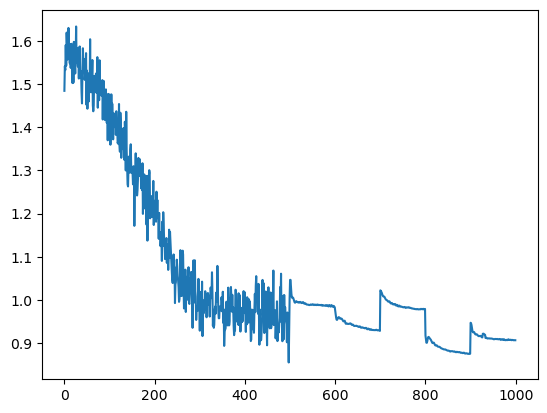

In [17]:
import matplotlib.pyplot as plt
print(learning_rate)
plt.plot(losses)
plt.show()

In [12]:
# Save the model's state_dict
torch.save(policy_net.state_dict(), 'land_select_model.pth')


In [16]:
#Further Training
#policy_net.add_postprocess()
learning_rate = 1e-3
weight_decay = 1e-5  # You can adjust this value as needed
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate, weight_decay=weight_decay)
deck_refresh = 100
for episode in range(num_episodes):
    if episode % deck_refresh == 0: #Keep decks for a short length of time, so that training can go towards something consistent for a while
        total_lands = int(random.random()*10)+15 #Currently randomised, should this be fed into the model?
        # Generate random cost_ratios
        color_combinations = get_color_combinations(colors)
        color_combinations+= [random.choices(["W", "U","B", "R","G"],k=2) for _ in range(32)]
        decks = [
            select_cards(shortened_card_data, total_lands, 
                         {'color': c},
                         exclusive = {'color': True}, blankparams = False,  negparams = {"card_type":["Land", "Token", "Emblem"]}
                        ) for c in color_combinations]
        states = [# Sample state (land_ratios) from the policy
            torch.tensor(np.concatenate((deck_costs(deck)[0], np.asarray([total_lands*0.05]))), dtype=torch.float32).unsqueeze(
                0)
            for deck in decks
        ]
        
    
    
    batch_losses = []
    batch_minprob = []
    for state, deck in zip(states, decks):
        # Sample action (land_ratios) from the policy
        land_ratios = policy_net(state).requires_grad_().squeeze(0)
        land_ratios = torch.abs(land_ratios)#.requires_grad_()

        # Perform any necessary normalization or conversion to integers, etc. here
        land_ratios = torch.mul(land_ratios, total_lands*0.2).requires_grad_()
        land_ratios = soft_integer_round(land_ratios)
        loss, minprob = eval_deck_tensor(deck, land_ratios)
        loss = torch.add(loss, torch.pow(torch.sub(torch.div(torch.sum(land_ratios),total_lands),1),2), alpha=2)
        batch_losses.append(loss)
        batch_minprob.append(minprob[0])
    
    
    # Update the model's parameters
    avg_loss = torch.stack(batch_losses).mean()
    optimizer.zero_grad()
    avg_loss.backward()
    optimizer.step()
    losses.append(avg_loss.item())#.detach().numpy()[0])
    if False and (episode+1) %500 == 0: #Readjust model periodically
        policy_net.add_postprocess()
        optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
    if 0 ==episode % (deck_refresh*100):#in ((episode+1) % (deck_refresh),episode % (deck_refresh)) :
        print(f"Episode {episode}, Loss: {avg_loss.item()}, minprob: {torch.stack(batch_minprob).mean()}")
        #policy_net.print_weights()
        #print(land_ratios[0:-1])
        #print(torch.tensor(minimums, dtype=torch.float32)[0:-1])
        if 0 == episode % (deck_refresh) :
            print(states[-1][0][0:6])
            print(states[-1][0][6:12])
            print(states[-1][0][12:18])
            print(states[-1][0][18:24])
            print(land_ratios)
            print(loss)
            for name, param in policy_net.named_parameters():
                if False and param.grad is not None:
                    print(name, param.grad.norm())

Episode 0, Loss: 1.0465924739837646, minprob: 0.2598021626472473
tensor([0.0000, 0.0000, 0.0000, 0.5000, 0.2917, 0.0000])
tensor([0.0000, 0.0000, 0.0000, 0.4000, 0.4000, 0.0000])
tensor([0.0000, 0.0000, 0.0000, 0.3931, 0.1639, 0.0000])
tensor([0.0000, 0.3500, 0.1583, 0.1250, 0.4000, 1.2000])
tensor([5.3880e-02, 7.6894e-02, 1.4334e-02, 1.5290e+01, 9.0798e+00, 5.5011e-03],
       grad_fn=<AddBackward0>)
tensor(0.6235, grad_fn=<AddBackward0>)


In [ ]:
print(losses)

In [578]:


# Define the neural network architecture
class ContinuousPolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ContinuousPolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

        # Initialize weights
        init.normal_(self.fc1.weight, mean=0.5, std=0.25)
        init.normal_(self.fc2.weight, mean=0.5, std=0.25)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def print_weights(self):
        print("fc1.weight", torch.sum(self.fc1.weight).item())
        print("fc1.bias", torch.sum(self.fc1.bias).item())
        print("fc2.weight", torch.sum(self.fc2.weight).item())
        print("fc2.bias", torch.sum(self.fc2.bias).item())


# Define hyperparameters
input_size = 12  # cost_ratios and minimums concatenated
hidden_size = 128
output_size = 6  # number of possible actions (land_ratios)
learning_rate = 1
num_episodes = 50000
deck_refresh = 10

# Create the policy network
policy_net = ContinuousPolicyNetwork(input_size, hidden_size, output_size)
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)

prelearning = 10
batch_size = 32

for episode in range(num_episodes):
    if episode % deck_refresh == 0: #Keep decks for a short length of time, so that training can go towards something consistent for a while
        total_lands = int(random.random()*20)+10 #Currently randomised, should this be fed into the model?
        # Generate a random cost_ratios and minimums (replace this with your actual data)
        newdeck = select_cards(shortened_card_data, total_lands, {'color': random.sample(["W", "U","B", "R","G", ""],2)},exclusive = False, blankparams = False,  negparams = {"card_type":["Land", "Token", "Emblem"]})
        cost_ratios, minimums = deck_costs(newdeck) #Two 1*6 nparrays
        state = torch.tensor(np.concatenate((cost_ratios, minimums*0.1)), dtype=torch.float32).unsqueeze(0)
        
        
    # Sample action (land_ratios) from the policy
    #action_probs = policy_net(state)
    
    # Convert probabilities to land_ratios
    land_ratios = policy_net(state).requires_grad_().squeeze(0)
    land_ratios = torch.abs(land_ratios).requires_grad_()
    #land_ratios = torch.clamp(land_ratios, 0, 1)#.requires_grad_()  # Clamp the values between 0 and 1
    
    # Perform any necessary normalization or conversion to integers, etc. here
    # Example: Normalize the values to sum to a specific total number of lands
    land_ratios = ((land_ratios / max(land_ratios.sum(),0.25)) * total_lands).requires_grad_()
    
    #print(land_ratios)
    filtered_land_ratios = torch.max(land_ratios, torch.tensor(minimums, dtype=torch.float32)).requires_grad_()
    
    if prelearning:
        loss = torch.nn.functional.cross_entropy(land_ratios, torch.tensor(minimums, dtype=torch.float32))
        #_, minprob = eval_deck_tensor(newdeck, land_ratios, filtered_land_ratios)
        if loss < 5:
            prelearning -= 1
            if not prelearning:
                print(f"Prelearning done, episode{episode}")
    else:
        loss, minprob = eval_deck_tensor(newdeck, land_ratios, filtered_land_ratios)
    
    # Update the model's parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if 0 in (1,episode % (deck_refresh*10)) :
        print(f"Episode {episode}, Loss: {loss.item()}, minprob: {minprob[0]}, {minprob[-1]}")
        #policy_net.print_weights()
        print(land_ratios[0:-1])
        print(torch.tensor(minimums, dtype=torch.float32)[0:-1])
        for name, param in policy_net.named_parameters():
            if param.grad is not None:
                print(name, param.grad.norm())


Episode 0, Loss: 15.719365119934082, minprob: 0.04502977058291435, 0.00045029769535176456
tensor([4.7630, 4.8535, 4.5350, 4.5391, 4.6155], grad_fn=<SliceBackward0>)
tensor([2., 3., 1., 0., 3.])
fc1.weight tensor(0.5388)
fc1.bias tensor(0.6901)
fc2.weight tensor(2.4276)
fc2.bias tensor(0.2260)
Prelearning done, episode99
Episode 100, Loss: 0.8293336033821106, minprob: 0.0452532134950161, 0.00045253211283124983
tensor([3.3977, 2.1430, 6.7502, 3.2627, 7.8030], grad_fn=<SliceBackward0>)
tensor([1., 1., 3., 2., 1.])
fc1.weight tensor(0.0002)
fc1.bias tensor(0.0002)
fc2.weight tensor(0.0077)
fc2.bias tensor(4.0200e-05)
Episode 200, Loss: 0.9991210103034973, minprob: 0.0, 0.00021983384795021266
tensor([1.1995, 1.0475, 2.6210, 1.5133, 3.1474], grad_fn=<SliceBackward0>)
tensor([2., 2., 0., 0., 2.])
fc1.weight tensor(0.)
fc1.bias tensor(0.)
fc2.weight tensor(0.)
fc2.bias tensor(0.)
Episode 300, Loss: 0.9700326323509216, minprob: 0.007502510212361813, 7.502509834012017e-05
tensor([3.2585, 2.1976,

KeyboardInterrupt: 

In [ ]:
for i in newdeck:
    print(i["color"])
    print(i["mana_cost"])
    print(i["mana_symbols"])
    print(i["name"])
    print(i["card_type"])
    print(i["oracle_text"])
    print(i)
    print()
    
for i in landeck:
    print(i["color"])
    print(i["name"])
    print(i["subtypes"])
    print(i)
    print()

In [ ]:
num_steps = 10
num_lanes = 5
special_steps = {0: 1, num_steps - 1: 1}
nodes, minimap, connections = generate_minimap(num_steps, num_lanes, special_steps)

In [ ]:
a = {'object': 'card', 'id': '29968873-56f3-4528-ab0b-f11dd67dd162', 'oracle_id': 'a7df5dc0-2564-4288-bc53-59affd896f79', 'multiverse_ids': [368982], 'mtgo_id': 48512, 'tcgplayer_id': 67947, 'cardmarket_id': 261492, 'name': 'Catch // Release', 'lang': 'en', 'released_at': '2013-05-03', 'uri': 'https://api.scryfall.com/cards/29968873-56f3-4528-ab0b-f11dd67dd162', 'scryfall_uri': 'https://scryfall.com/card/dgm/125/catch-release?utm_source=api', 'layout': 'split', 'highres_image': True, 'image_status': 'highres_scan', 'image_uris': {'small': 'https://cards.scryfall.io/small/front/2/9/29968873-56f3-4528-ab0b-f11dd67dd162.jpg?1562902690', 'normal': 'https://cards.scryfall.io/normal/front/2/9/29968873-56f3-4528-ab0b-f11dd67dd162.jpg?1562902690', 'large': 'https://cards.scryfall.io/large/front/2/9/29968873-56f3-4528-ab0b-f11dd67dd162.jpg?1562902690', 'png': 'https://cards.scryfall.io/png/front/2/9/29968873-56f3-4528-ab0b-f11dd67dd162.png?1562902690', 'art_crop': 'https://cards.scryfall.io/art_crop/front/2/9/29968873-56f3-4528-ab0b-f11dd67dd162.jpg?1562902690', 'border_crop': 'https://cards.scryfall.io/border_crop/front/2/9/29968873-56f3-4528-ab0b-f11dd67dd162.jpg?1562902690'}, 'mana_cost': '{1}{U}{R} // {4}{R}{W}', 'cmc': 9.0, 'type_line': 'Sorcery // Sorcery', 'colors': ['R', 'U', 'W'], 'color_identity': ['R', 'U', 'W'], 'keywords': ['Fuse'], 'card_faces': [{'object': 'card_face', 'name': 'Catch', 'mana_cost': '{1}{U}{R}', 'type_line': 'Sorcery', 'oracle_text': 'Gain control of target permanent until end of turn. Untap it. It gains haste until end of turn.\nFuse (You may cast one or both halves of this card from your hand.)', 'watermark': 'izzet', 'artist': 'Kev Walker', 'artist_id': 'f366a0ee-a0cd-466d-ba6a-90058c7a31a6', 'illustration_id': 'cc953d3c-7790-4cec-818a-1a112ad57a2e'}, {'object': 'card_face', 'name': 'Release', 'flavor_name': '', 'mana_cost': '{4}{R}{W}', 'type_line': 'Sorcery', 'oracle_text': 'Each player sacrifices an artifact, a creature, an enchantment, a land, and a planeswalker.\nFuse (You may cast one or both halves of this card from your hand.)', 'watermark': 'boros', 'artist': 'Kev Walker', 'artist_id': 'f366a0ee-a0cd-466d-ba6a-90058c7a31a6'}], 'legalities': {'standard': 'not_legal', 'future': 'not_legal', 'historic': 'not_legal', 'gladiator': 'not_legal', 'pioneer': 'legal', 'explorer': 'not_legal', 'modern': 'legal', 'legacy': 'legal', 'pauper': 'not_legal', 'vintage': 'legal', 'penny': 'legal', 'commander': 'legal', 'oathbreaker': 'legal', 'brawl': 'not_legal', 'historicbrawl': 'not_legal', 'alchemy': 'not_legal', 'paupercommander': 'not_legal', 'duel': 'legal', 'oldschool': 'not_legal', 'premodern': 'not_legal', 'predh': 'not_legal'}, 'games': ['paper', 'mtgo'], 'reserved': False, 'foil': True, 'nonfoil': True, 'finishes': ['nonfoil', 'foil'], 'oversized': False, 'promo': False, 'reprint': False, 'variation': False, 'set_id': 'c8bd8520-cd98-45cd-b533-8d40c2087426', 'set': 'dgm', 'set_name': "Dragon's Maze", 'set_type': 'expansion', 'set_uri': 'https://api.scryfall.com/sets/c8bd8520-cd98-45cd-b533-8d40c2087426', 'set_search_uri': 'https://api.scryfall.com/cards/search?order=set&q=e%3Adgm&unique=prints', 'scryfall_set_uri': 'https://scryfall.com/sets/dgm?utm_source=api', 'rulings_uri': 'https://api.scryfall.com/cards/29968873-56f3-4528-ab0b-f11dd67dd162/rulings', 'prints_search_uri': 'https://api.scryfall.com/cards/search?order=released&q=oracleid%3Aa7df5dc0-2564-4288-bc53-59affd896f79&unique=prints', 'collector_number': '125', 'digital': False, 'rarity': 'rare', 'card_back_id': '0aeebaf5-8c7d-4636-9e82-8c27447861f7', 'artist': 'Kev Walker', 'artist_ids': ['f366a0ee-a0cd-466d-ba6a-90058c7a31a6'], 'illustration_id': 'cc953d3c-7790-4cec-818a-1a112ad57a2e', 'border_color': 'black', 'frame': '2003', 'full_art': False, 'textless': False, 'booster': True, 'story_spotlight': False, 'edhrec_rank': 16903, 'penny_rank': 3634, 'prices': {'usd': '0.18', 'usd_foil': '0.34', 'usd_etched': None, 'eur': '0.25', 'eur_foil': '0.79', 'tix': '0.01'}, 'related_uris': {'gatherer': 'https://gatherer.wizards.com/Pages/Card/Details.aspx?multiverseid=368982', 'tcgplayer_infinite_articles': 'https://infinite.tcgplayer.com/search?contentMode=article&game=magic&partner=scryfall&q=Catch+%2F%2F+Release&utm_campaign=affiliate&utm_medium=api&utm_source=scryfall', 'tcgplayer_infinite_decks': 'https://infinite.tcgplayer.com/search?contentMode=deck&game=magic&partner=scryfall&q=Catch+%2F%2F+Release&utm_campaign=affiliate&utm_medium=api&utm_source=scryfall', 'edhrec': 'https://edhrec.com/route/?cc=Catch+%2F%2F+Release'}, 'purchase_uris': {'tcgplayer': 'https://www.tcgplayer.com/product/67947?page=1&utm_campaign=affiliate&utm_medium=api&utm_source=scryfall', 'cardmarket': 'https://www.cardmarket.com/en/Magic/Products/Search?referrer=scryfall&searchString=Catch+%2F%2F+Release&utm_campaign=card_prices&utm_medium=text&utm_source=scryfall', 'cardhoarder': 'https://www.cardhoarder.com/cards/48512?affiliate_id=scryfall&ref=card-profile&utm_campaign=affiliate&utm_medium=card&utm_source=scryfall'}}
for i in a["card_faces"]:
    for c, v in i.items():
        print(c+": "+str(v))
    print()

In [ ]:

with open("merged_card_data.json", "r") as file:
    card_data = json.load(file)

def filter_cards(cards, sets, rarity, color):
    filtered_cards = [
        card_e for card_e in cards
        if card_e["set"] in sets
        and card_e["object"] != "card"
    ]
    return random.choice(filtered_cards) if filtered_cards else None
def split_type_line(type_line):
    if '—' in type_line:
        card_type, subtypes_str = type_line.split('—', 1)
        subtypes = subtypes_str.strip().split(' ')
        for subtype in subtypes:
            subtype = subtype.strip()
    else:
        card_type = type_line
        subtypes = []
    if "Legendary" in card_type:
        card_type = card_type[9:]
        legend = True
    else:
        legend = False
    card_type = card_type.strip().split(' ')
    for cardtype in card_type:
        cardtype = cardtype.strip()
    return card_type, subtypes, legend
shortened_card_data = []
for card in card_data:
    
    card_type, subtypes, legend = split_type_line(card["type_line"])
    try:
        shortened_card = {
            "set": [card["set"]],
            "rarity": [card["rarity"]],
            "color": card["color_identity"],
            "mana_cost": [i for i in card["mana_cost"] if i in "0123456789/WUBRGNPSXYZC"],
            "mana_symbols": [i for i in card["mana_cost"] if i in "WUBRGNPSC"],
            "name": [card["name"]],
            "cmc": [card["cmc"]],
            "card_type": card_type,
            "subtypes": subtypes,
            "keywords": card["keywords"],
            "watermark": [card_face["watermark"] for card_face in card["card_faces"]] if "card_faces" in card else [card["watermark"]] if "watermark" in card else [],
            "oracle_text": [card_face["oracle_text"] for card_face in card["card_faces"]] if "card_faces" in card else [card["oracle_text"]],
            "legend": [legend]
        }
    except:
        print(card)
    shortened_card_data.append(shortened_card)

# Save the shortened card data to a new JSON file
with open("shortened_card_data.json", "w") as file:
    json.dump(shortened_card_data, file)

In [ ]:
target_sets = ["lrw", "mor"]
target_rarity = ["rare"]
target_color = [["G"]]

selected_card = filter_cards(card_data, target_sets, target_rarity, target_color)

if selected_card:
    print(f"Selected card: {selected_card['name']} from {selected_card['set']}")
else:
    print("No card found that matches the given criteria.")


In [ ]:
if set(["G"]).intersection(set([])):
    print("yes")

In [ ]:
def match(card_e, params, exclusive, negparams=None, blankparams=None):
    all_params = set(params.keys())
    if negparams:
        all_params = all_params.union(set(negparams.keys()))
    if blankparams:
        all_params = all_params.union(set(blankparams.keys()))
    for param in all_params:
        if param in card_e:
            values = params.get(param, [])
            if isinstance(exclusive, dict):
                if (param in exclusive) and (param in params):
                    exclusive_param = exclusive[param]
                else:
                    exclusive_param = False#Default to inclusive mode
            else:
                exclusive_param = exclusive

            if negparams and (param in negparams) and (negparams[param]):
                if set(card_e[param]).intersection(set(negparams[param])):
                    return False

            if blankparams and (param in blankparams):
                if blankparams[param]:
                    if len(card_e[param]) == 0:
                        return False

            if len(card_e[param]):
                if exclusive_param:
                    if not set(card_e[param]).issubset(set(values)):
                        return False
                elif len(values): #Blanks checked separately, therefore only check for overlap with values :
                    if not set(card_e[param]).intersection(set(values)):
                        return False

    return True



def select_cards(cards, n, params, exclusive=True, negparams=None, blankparams=None):
    matching_cards = [card_e for card_e in cards if match(card_e, params, exclusive, negparams, blankparams)]
    if len(matching_cards) < n:
        return random.choice(matching_cards, len(matching_cards))
    else:
        return random.sample(matching_cards, n)

with open("shortened_card_data.json", "r") as file:
    shortened_card_data = json.load(file)

fightparams = {"set": [],
        "rarity": [],
        "color": [],
        "mana_cost": ["4"],
        "mana_symbols": [],
        "name": [],
        "cmc": [],
        "card_type": ["Basic"],
        "subtypes": [],
        "watermark": [],
        "keywords": [],
        "oracle_text": [],
        "legend": []}#Values that are desired, such that at least one should be present if a card has any values for that parameter

exclusive_params = {"set": False,
        "rarity": False,
        "color": True,
        "mana_cost": False,
        "mana_symbols": False,
        "name": False,
        "cmc": False,
        "card_type": False,
        "subtypes": False,
        "keywords": False,
        "oracle_text": False,
        "legend": False}#Whether the parameter list is exclusive, ie any values outside of that list are disallowed if exclusive_params[params]==True
blankparams = {"set": False,
        "rarity": False,
        "color": True,
        "mana_cost": False,
        "mana_symbols": False,
        "name": False,
        "cmc": False,
        "card_type": False,
        "subtypes": False,
        "keywords": False,
        "oracle_text": False,
        "legend": False} #Dict of whether blank values are disallowed, eg colorless cards or no subtypes
negparams = {"set": [],
        "rarity": [],
        "color": [],
        "mana_cost": [],
        "mana_symbols": [],
        "name": [],
        "cmc": [],
        "card_type": ["Token"],
        "subtypes": [],
        "keywords": [],
        "oracle_text": [],
        "legend": []} #Values that are specifically not allowed
fightparams = {"color": [],
        "mana_cost": [],
        "card_type": [],
        "watermark": ["boros"],
        "set":[],
        "keywords": []}#Values that are desired, such that at least one should be present if a card has any values for that parameter

exclusive_params = {"color": True,
        "mana_cost": False,
        "mana_symbols": False,
        "watermark": False,
        "subtypes": False}#Whether the parameter list is exclusive, ie any values outside of that list are disallowed if exclusive_params[params]==True
blankparams = {"color": False,
        "mana_cost": False,
        "mana_symbols": False,
        "name": False,
        "cmc": False,
        "watermark": True,
        "card_type": False,
        "keywords": False} #Dict of whether blank values are disallowed, eg colorless cards or no subtypes
negparams = {"color": [],
        "mana_cost": [],
        "card_type": ["Token","Emblem"],
        "subtypes": []} #Values that are specifically not allowed
n = 5
selected_cards = select_cards(shortened_card_data, n, fightparams, exclusive=False,
                              negparams=None, blankparams=blankparams)


for card in selected_cards:
    print(card["color"])
    print(card["subtypes"])
    print(card["card_type"])
    print(card["mana_cost"])
    print(card["name"])
    print(card["oracle_text"])
    print(card["set"])
    print()

In [ ]:
uniques = []
param = "watermark"
for card in shortened_card_data:
    for entry in card[param]:
        if not entry in uniques:
            uniques.append(entry)
            print(entry)

In [ ]:

n = 50


# You'll need to execute this in multiple runs, one for each color and colorless cards, and then combine the results.
colors = ["W", "U", "B", "R", "G", []]  # Include an empty list for colorless cards
params = {"color":["G", "R","W"], "set":["lrw","mrn"], "cmc":[1,2,3,4,5]}
exclusive = {"name": True, "color": True, "set": True, "subtypes": True}
blankparams = {"color": True, "subtypes": False}
negparams = {"card_type": ["Land", "Token"]}

# Expected output: A deck containing an equal number of cards from each color and colorless cards, with no artifacts.
selected_cards=select_cards(shortened_card_data, 15, params, exclusive=exclusive,
                              negparams=negparams, blankparams=blankparams)

print(len(selected_cards))
for card in selected_cards:
    print(card["color"])
    print(card["mana_cost"])
    print(card["card_type"])
    print(card["subtypes"])
    print(card["keywords"])
    print(card["name"])
    print(card["cmc"])
    #print(card["rarity"])
    print(card["oracle_text"])
    print()

In [ ]:
selected_cards[0]["set"][0]

In [ ]:
from cardutil import sample_deck
a = sample_deck.pop(0)
a["set"][0]

In [ ]:
a["set"][0]

In [ ]:
for i in range(15):
    card = shortened_card_data[i+535]
    
    if "subtypes" in card and card["subtypes"]:
        print("here")
    for key, value in card.items():
        print(f"{key}: {value}")
    print("")